In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from Utilities import PlotImages

In [2]:
def buildCustomModel(input_shape, output, convolutionalRegions=5, layersInRegion=3):
    model = Sequential()
    
    model.add(Conv2D(10,3,
                     padding='same', 
                     input_shape=input_shape,
                     activation='relu'))
    
#     for regionNum in range(convolutionalRegions):
#         for layerNum in range(layersInRegion):
#             model.add(Conv2D((2^(regionNum+1))*5,3,
#                      padding='same',
#                      activation='relu'))
#         model.add(MaxPooling2D(pool_size=(2,2),
#                      strides=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(200,
                     activation='relu'))
    model.add(Dense(200,
                     activation='relu'))
    model.add(Dense(200,
                     activation='relu'))
    model.add(Dense(output,
                     activation='softmax'))
    return model

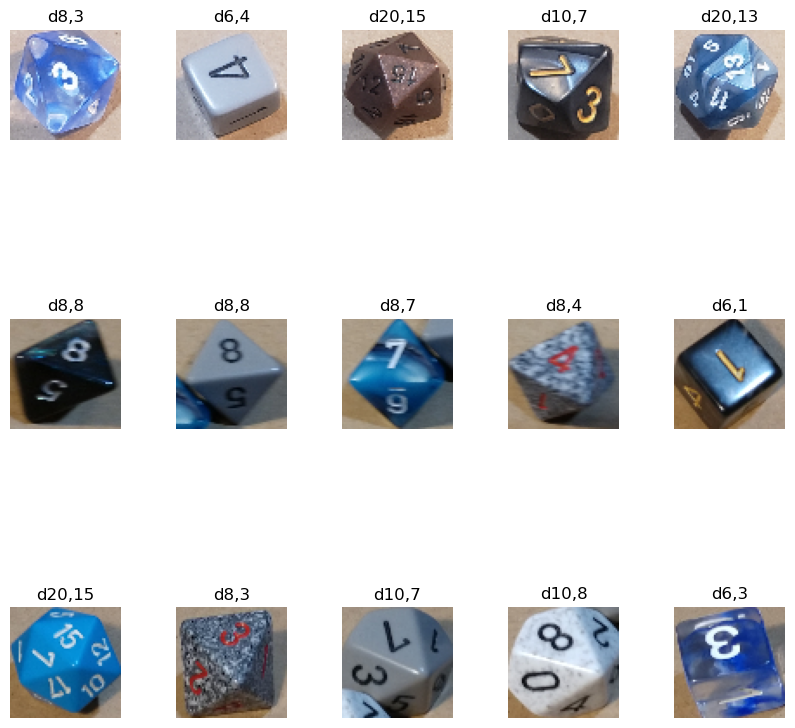

In [3]:
data = np.load("/work/MA490_DeepLearning/Share/Dice/CleanedDiceData64.npz", allow_pickle=True)
images = data["images"]
labels = data["labels"]
PlotImages(2000, 15, 3, 5, images, labels)
plt.show()

In [4]:
typeOfDice = 6
d6images = []
d6labels = []
for i in range(len(images)):
    split = labels[i].split(",")
    if len(split) != 2:
        continue
    (diceType, diceValue) = split
    if diceType == "d"+str(typeOfDice) and diceValue.isnumeric() and int(diceValue) < typeOfDice+1:
        d6images.append(images[i])
        d6labels.append(diceValue)
        
d6images = np.array(d6images)
d6labels = np.array(d6labels)

In [5]:
numTest = 40
d6imagesTest = d6images[:numTest]
d6labelsTest = d6labels[:numTest]
d6images = d6images[numTest:]
d6labels = d6labels[numTest:]

In [6]:
print(d6images.shape)
print(type(d6labels[0]))
X = d6images
y = np.array(list(map(lambda x: float(x) - 1, d6labels)))

(500, 64, 64, 3)
<class 'numpy.str_'>


In [7]:
###################
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
###################

In [8]:
customModel = buildCustomModel((64,64,3), 6, 4, 3)

customModel.compile(loss='sparse_categorical_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy'])

In [9]:
customModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 10)        280       
_________________________________________________________________
flatten (Flatten)            (None, 40960)             0         
_________________________________________________________________
dense (Dense)                (None, 200)               8192200   
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 1206      
Total params: 8,274,086
Trainable params: 8,274,086
Non-trainable params: 0
______________________________________________

In [ ]:
with tf.device('/device:GPU:5'):
    hist = customModel.fit(X,y,
            epochs=50,
            validation_split=0.2,
            verbose=2)

Epoch 1/50
13/13 - 13s - loss: 1296.8059 - accuracy: 0.1950 - val_loss: 886.0773 - val_accuracy: 0.1300
Epoch 2/50
13/13 - 0s - loss: 516.3998 - accuracy: 0.1425 - val_loss: 188.0848 - val_accuracy: 0.1500
Epoch 3/50
13/13 - 0s - loss: 79.9941 - accuracy: 0.1875 - val_loss: 56.5843 - val_accuracy: 0.1700
Epoch 4/50
13/13 - 0s - loss: 60.3869 - accuracy: 0.2250 - val_loss: 24.4731 - val_accuracy: 0.1600
Epoch 5/50
13/13 - 0s - loss: 18.9543 - accuracy: 0.2625 - val_loss: 13.6609 - val_accuracy: 0.1200
Epoch 6/50
13/13 - 0s - loss: 5.6491 - accuracy: 0.4100 - val_loss: 6.8096 - val_accuracy: 0.1200
Epoch 7/50
13/13 - 0s - loss: 1.8248 - accuracy: 0.5775 - val_loss: 4.1659 - val_accuracy: 0.1800
Epoch 8/50
13/13 - 0s - loss: 0.3548 - accuracy: 0.8925 - val_loss: 3.4179 - val_accuracy: 0.2800
Epoch 9/50
13/13 - 0s - loss: 0.1679 - accuracy: 0.9425 - val_loss: 4.5359 - val_accuracy: 0.2100
Epoch 10/50
13/13 - 0s - loss: 0.0807 - accuracy: 0.9675 - val_loss: 4.4691 - val_accuracy: 0.2000
Epo